## Import libabries 

In [1]:
import cv2
import os
import torch
import numpy as np
from glob import glob
from custom_utils import box_iom
import matplotlib.pyplot as plt

In [2]:
def yolobbox2bbox(x,y,w,h, img_w, img_h):
    x1, y1 = (x-w/2) * img_w, (y-h/2) * img_h
    x2, y2 = (x+w/2) * img_w, (y+h/2) * img_h
    return x1, y1, x2, y2

## Load resulting image


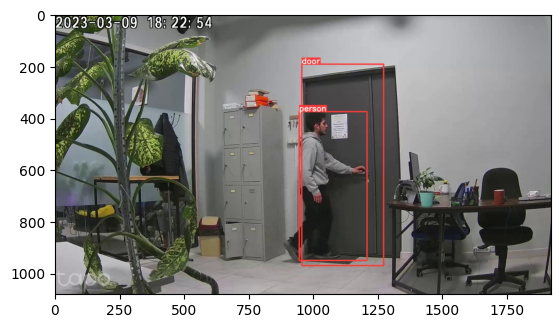

In [3]:
image = cv2.imread('runs/detect/visualize2/image.jpg')
plt.imshow(image[..., ::-1])
plt.show()

In [4]:
#Load labels/x/y/w/h/confidence from .txt file
person_box = np.array(list(map(lambda x: list(map(float, x.replace("\n", "").split(" "))), open('runs/detect/visualize2/labels/image.txt').readlines())))
door_box = np.array(list(map(lambda x: list(map(float, x.replace("\n", "").split(" "))), open('runs/detect/visualize/labels/image.txt').readlines())))


In [5]:
# labels/x/y/w/h/confidence --> x/y/w/h
person_box = person_box[0][1:-1]
door_box = door_box[0][1:-1]

In [6]:
# x/y/w/h --> x_min,y_min,x_max, y_max
door_box_cordinates = yolobbox2bbox(door_box[0], door_box[1], door_box[2], door_box[3], image.shape[1],image.shape[0])
person_box_cordinates = yolobbox2bbox(person_box[0], person_box[1], person_box[2], person_box[3], image.shape[1],image.shape[0])
print(f'door box cordinates {door_box_cordinates}')
print(f'person box cordinates {person_box_cordinates}')

door box cordinates (953.00064, 193.00031999999996, 1269.0, 969.99984)
person box cordinates (943.00032, 375.99984, 1204.99968, 950.0004)


In [7]:
box_iom(torch.Tensor([door_box_cordinates]), torch.Tensor([person_box_cordinates]))

tensor([[0.9618]])